<h1 "style=color:#3D2C8D;">Midterm I Review: IBM Stock Analysis Using Moving Averages</h1>

<em>@author Annice <br>
Date: 092921 <br>
BMEN 207 Texas A&M University <br><br></em>
Description: In this tutorial we extract a json file containing information about IBM stock prices from a free API and then convert it into a dataframe then we will find moving averages using one column and plot the moving averages. 
<br>Steps:
<ul>
    <li>   I.   Get the JSON file from an API</li>
    <li>   II.  Save as a dataframe</li>
    <li>   III. Manipulate the dataframe</li>
    <li>   IV.  Write a function to find moving averages</li>
    <li>   V.   Plot the Moving average</li>
    </ul>
<br>    
Topics covered: strings, dictionaries, Pandas, Matplotlib, API & JSON files, functions and vectorization. Will also go over moving averages used in the first project

<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/IBM_logo.svg" height=400, width=400 alt="surprised-meme">

<h2>Step I:</h2>

In [22]:
#We are going to use a free API
#Question: What module do I need to import?

In [1]:
#import related module
import requests

The API is https://www.alphavantage.co/documentation/

Need to register but authentication is through endpoint<br>
Meaning no headers ...

In [2]:
#endpoint already given to you/ register for api key. YOU HAVE TO CHANGE THE API KEY to your own.
endpoint = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=60min&apikey=3Z9EFGLDHMYQMVUB'
#extract the json file from the endpoint
request = requests.get(url=endpoint)
#Get the status code
request.status_code

200

In [3]:
#request JSON
data = request.json()

In [4]:
#Take a look at the JSON data
data

{'Meta Data': {'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
  '2. Symbol': 'IBM',
  '3. Last Refreshed': '2021-09-29 20:00:00',
  '4. Interval': '60min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (60min)': {'2021-09-29 20:00:00': {'1. open': '139.5000',
   '2. high': '139.5000',
   '3. low': '139.5000',
   '4. close': '139.5000',
   '5. volume': '210'},
  '2021-09-29 18:00:00': {'1. open': '139.2500',
   '2. high': '139.2500',
   '3. low': '139.2401',
   '4. close': '139.2401',
   '5. volume': '295'},
  '2021-09-29 17:00:00': {'1. open': '139.1800',
   '2. high': '139.3800',
   '3. low': '139.1800',
   '4. close': '139.3000',
   '5. volume': '48234'},
  '2021-09-29 16:00:00': {'1. open': '139.8300',
   '2. high': '139.8900',
   '3. low': '139.0700',
   '4. close': '139.1900',
   '5. volume': '701213'},
  '2021-09-29 15:00:00': {'1. open': '139.3600',
   '2. high': '139.9300',
   '3. low': '139.3300',
   '4. close': '

Remember pretty printing?!

In [5]:
#Try pretty printing the JSON file
import pprint
pprint.pprint(data)

{'Meta Data': {'1. Information': 'Intraday (60min) open, high, low, close '
                                 'prices and volume',
               '2. Symbol': 'IBM',
               '3. Last Refreshed': '2021-09-29 20:00:00',
               '4. Interval': '60min',
               '5. Output Size': 'Compact',
               '6. Time Zone': 'US/Eastern'},
 'Time Series (60min)': {'2021-09-20 11:00:00': {'1. open': '134.7050',
                                                 '2. high': '134.8300',
                                                 '3. low': '134.2200',
                                                 '4. close': '134.7700',
                                                 '5. volume': '449465'},
                         '2021-09-20 12:00:00': {'1. open': '134.7600',
                                                 '2. high': '135.1800',
                                                 '3. low': '134.3929',
                                                 '4. close': '134.4100'

<h2>Step II:</h2>

In [13]:
#Transform into dataframe
#Question: What module should I import now?

In [6]:
#import related module
import pandas as pd

In [8]:
#convert dict to dataframe
#take a look at the dataframe
df = pd.DataFrame(data["Time Series (60min)"].items())

In [9]:
df

,0,1
0,2021-09-29 20:00:00,"{'1. open': '139.5000', '2. high': '139.5000',..."
1,2021-09-29 18:00:00,"{'1. open': '139.2500', '2. high': '139.2500',..."
2,2021-09-29 17:00:00,"{'1. open': '139.1800', '2. high': '139.3800',..."
3,2021-09-29 16:00:00,"{'1. open': '139.8300', '2. high': '139.8900',..."
4,2021-09-29 15:00:00,"{'1. open': '139.3600', '2. high': '139.9300',..."
...,...,...
95,2021-09-20 15:00:00,"{'1. open': '133.4800', '2. high': '133.5500',..."
96,2021-09-20 14:00:00,"{'1. open': '133.5000', '2. high': '133.5500',..."
97,2021-09-20 13:00:00,"{'1. open': '134.4200', '2. high': '134.4600',..."
98,2021-09-20 12:00:00,"{'1. open': '134.7600', '2. high': '135.1800',..."


#hmmm.... so our goal is to separate the opening, closing, high and low prices of stocks in the second column into separate coloumns 

<h2>Step III:</h2>

**** CAUTION: the type of data stored in the pandas dataframe is currently dictionary so you have to convert it into string ****

In [10]:
#check the type of the data in each cell 
type(df[1][1])

dict

In [11]:
#Let's convert the dictionary into another type we can split it. remember how to do that?! we want to convert it to string
#check the type of the cell again
df = df.astype(str)

In [12]:
type(df[1][1])

str

In [13]:
#Let's take a closer look at the data stored in column 1
df[1][1]

"{'1. open': '139.2500', '2. high': '139.2500', '3. low': '139.2401', '4. close': '139.2401', '5. volume': '295'}"

In [4]:
#Let's check one cell

In [15]:
#Split the second column into multiple columns using ',' as the delimeter
#How can I do this?!
df[["open", "high", "low", "close", "volume"]] = df[1].str.split(pat=",", expand=True)

In [16]:
#check df
df

,0,1,open,high,low,close,volume
0,2021-09-29 20:00:00,"{'1. open': '139.5000', '2. high': '139.5000',...",{'1. open': '139.5000','2. high': '139.5000','3. low': '139.5000','4. close': '139.5000','5. volume': '210'}
1,2021-09-29 18:00:00,"{'1. open': '139.2500', '2. high': '139.2500',...",{'1. open': '139.2500','2. high': '139.2500','3. low': '139.2401','4. close': '139.2401','5. volume': '295'}
2,2021-09-29 17:00:00,"{'1. open': '139.1800', '2. high': '139.3800',...",{'1. open': '139.1800','2. high': '139.3800','3. low': '139.1800','4. close': '139.3000','5. volume': '48234'}
3,2021-09-29 16:00:00,"{'1. open': '139.8300', '2. high': '139.8900',...",{'1. open': '139.8300','2. high': '139.8900','3. low': '139.0700','4. close': '139.1900','5. volume': '701213'}
4,2021-09-29 15:00:00,"{'1. open': '139.3600', '2. high': '139.9300',...",{'1. open': '139.3600','2. high': '139.9300','3. low': '139.3300','4. close': '139.8200','5. volume': '294440'}
...,...,...,...,...,...,...,...
95,2021-09-20 15:00:00,"{'1. open': '133.4800', '2. high': '133.5500',...",{'1. open': '133.4800','2. high': '133.5500','3. low': '132.7850','4. close': '133.0310','5. volume': '475292'}
96,2021-09-20 14:00:00,"{'1. open': '133.5000', '2. high': '133.5500',...",{'1. open': '133.5000','2. high': '133.5500','3. low': '133.1200','4. close': '133.4600','5. volume': '476349'}
97,2021-09-20 13:00:00,"{'1. open': '134.4200', '2. high': '134.4600',...",{'1. open': '134.4200','2. high': '134.4600','3. low': '133.4700','4. close': '133.5100','5. volume': '436531'}
98,2021-09-20 12:00:00,"{'1. open': '134.7600', '2. high': '135.1800',...",{'1. open': '134.7600','2. high': '135.1800','3. low': '134.3929','4. close': '134.4100','5. volume': '430674'}


In [19]:
#Rename the first two columns
df = df.rename(columns = {0:'Date', 1:'Unprocessed Data'})
df

,Date,Unprocessed Data,open,high,low,close,volume
0,2021-09-29 20:00:00,"{'1. open': '139.5000', '2. high': '139.5000',...",{'1. open': '139.5000','2. high': '139.5000','3. low': '139.5000','4. close': '139.5000','5. volume': '210'}
1,2021-09-29 18:00:00,"{'1. open': '139.2500', '2. high': '139.2500',...",{'1. open': '139.2500','2. high': '139.2500','3. low': '139.2401','4. close': '139.2401','5. volume': '295'}
2,2021-09-29 17:00:00,"{'1. open': '139.1800', '2. high': '139.3800',...",{'1. open': '139.1800','2. high': '139.3800','3. low': '139.1800','4. close': '139.3000','5. volume': '48234'}
3,2021-09-29 16:00:00,"{'1. open': '139.8300', '2. high': '139.8900',...",{'1. open': '139.8300','2. high': '139.8900','3. low': '139.0700','4. close': '139.1900','5. volume': '701213'}
4,2021-09-29 15:00:00,"{'1. open': '139.3600', '2. high': '139.9300',...",{'1. open': '139.3600','2. high': '139.9300','3. low': '139.3300','4. close': '139.8200','5. volume': '294440'}
...,...,...,...,...,...,...,...
95,2021-09-20 15:00:00,"{'1. open': '133.4800', '2. high': '133.5500',...",{'1. open': '133.4800','2. high': '133.5500','3. low': '132.7850','4. close': '133.0310','5. volume': '475292'}
96,2021-09-20 14:00:00,"{'1. open': '133.5000', '2. high': '133.5500',...",{'1. open': '133.5000','2. high': '133.5500','3. low': '133.1200','4. close': '133.4600','5. volume': '476349'}
97,2021-09-20 13:00:00,"{'1. open': '134.4200', '2. high': '134.4600',...",{'1. open': '134.4200','2. high': '134.4600','3. low': '133.4700','4. close': '133.5100','5. volume': '436531'}
98,2021-09-20 12:00:00,"{'1. open': '134.7600', '2. high': '135.1800',...",{'1. open': '134.7600','2. high': '135.1800','3. low': '134.3929','4. close': '134.4100','5. volume': '430674'}


In [20]:
#delete the unprocessed data column
df = df.drop(columns="Unprocessed Data")
df

,Date,open,high,low,close,volume
0,2021-09-29 20:00:00,{'1. open': '139.5000','2. high': '139.5000','3. low': '139.5000','4. close': '139.5000','5. volume': '210'}
1,2021-09-29 18:00:00,{'1. open': '139.2500','2. high': '139.2500','3. low': '139.2401','4. close': '139.2401','5. volume': '295'}
2,2021-09-29 17:00:00,{'1. open': '139.1800','2. high': '139.3800','3. low': '139.1800','4. close': '139.3000','5. volume': '48234'}
3,2021-09-29 16:00:00,{'1. open': '139.8300','2. high': '139.8900','3. low': '139.0700','4. close': '139.1900','5. volume': '701213'}
4,2021-09-29 15:00:00,{'1. open': '139.3600','2. high': '139.9300','3. low': '139.3300','4. close': '139.8200','5. volume': '294440'}
...,...,...,...,...,...,...
95,2021-09-20 15:00:00,{'1. open': '133.4800','2. high': '133.5500','3. low': '132.7850','4. close': '133.0310','5. volume': '475292'}
96,2021-09-20 14:00:00,{'1. open': '133.5000','2. high': '133.5500','3. low': '133.1200','4. close': '133.4600','5. volume': '476349'}
97,2021-09-20 13:00:00,{'1. open': '134.4200','2. high': '134.4600','3. low': '133.4700','4. close': '133.5100','5. volume': '436531'}
98,2021-09-20 12:00:00,{'1. open': '134.7600','2. high': '135.1800','3. low': '134.3929','4. close': '134.4100','5. volume': '430674'}


In [21]:
#split again to extract highest value
df["high"].str.split(pat=" ", expand=True)

,0,1,2,3
0,,'2.,high':,'139.5000'
1,,'2.,high':,'139.2500'
2,,'2.,high':,'139.3800'
3,,'2.,high':,'139.8900'
4,,'2.,high':,'139.9300'
...,...,...,...,...
95,,'2.,high':,'133.5500'
96,,'2.,high':,'133.5500'
97,,'2.,high':,'134.4600'
98,,'2.,high':,'135.1800'


In [22]:
#split and save into columns
df["high"] = df["high"].str.split(pat=" ", expand=True)[3]

In [25]:
#take a look at df
df["high"] = df["high"].str.replace("'", "")

In [26]:
df

,Date,open,high,low,close,volume
0,2021-09-29 20:00:00,{'1. open': '139.5000',139.5000,'3. low': '139.5000','4. close': '139.5000','5. volume': '210'}
1,2021-09-29 18:00:00,{'1. open': '139.2500',139.2500,'3. low': '139.2401','4. close': '139.2401','5. volume': '295'}
2,2021-09-29 17:00:00,{'1. open': '139.1800',139.3800,'3. low': '139.1800','4. close': '139.3000','5. volume': '48234'}
3,2021-09-29 16:00:00,{'1. open': '139.8300',139.8900,'3. low': '139.0700','4. close': '139.1900','5. volume': '701213'}
4,2021-09-29 15:00:00,{'1. open': '139.3600',139.9300,'3. low': '139.3300','4. close': '139.8200','5. volume': '294440'}
...,...,...,...,...,...,...
95,2021-09-20 15:00:00,{'1. open': '133.4800',133.5500,'3. low': '132.7850','4. close': '133.0310','5. volume': '475292'}
96,2021-09-20 14:00:00,{'1. open': '133.5000',133.5500,'3. low': '133.1200','4. close': '133.4600','5. volume': '476349'}
97,2021-09-20 13:00:00,{'1. open': '134.4200',134.4600,'3. low': '133.4700','4. close': '133.5100','5. volume': '436531'}
98,2021-09-20 12:00:00,{'1. open': '134.7600',135.1800,'3. low': '134.3929','4. close': '134.4100','5. volume': '430674'}


In [28]:
#convert column into numeric
df["high"] = pd.to_numeric(df["high"])

In [29]:
#take a look at dataframe
df

,Date,open,high,low,close,volume
0,2021-09-29 20:00:00,{'1. open': '139.5000',139.50,'3. low': '139.5000','4. close': '139.5000','5. volume': '210'}
1,2021-09-29 18:00:00,{'1. open': '139.2500',139.25,'3. low': '139.2401','4. close': '139.2401','5. volume': '295'}
2,2021-09-29 17:00:00,{'1. open': '139.1800',139.38,'3. low': '139.1800','4. close': '139.3000','5. volume': '48234'}
3,2021-09-29 16:00:00,{'1. open': '139.8300',139.89,'3. low': '139.0700','4. close': '139.1900','5. volume': '701213'}
4,2021-09-29 15:00:00,{'1. open': '139.3600',139.93,'3. low': '139.3300','4. close': '139.8200','5. volume': '294440'}
...,...,...,...,...,...,...
95,2021-09-20 15:00:00,{'1. open': '133.4800',133.55,'3. low': '132.7850','4. close': '133.0310','5. volume': '475292'}
96,2021-09-20 14:00:00,{'1. open': '133.5000',133.55,'3. low': '133.1200','4. close': '133.4600','5. volume': '476349'}
97,2021-09-20 13:00:00,{'1. open': '134.4200',134.46,'3. low': '133.4700','4. close': '133.5100','5. volume': '436531'}
98,2021-09-20 12:00:00,{'1. open': '134.7600',135.18,'3. low': '134.3929','4. close': '134.4100','5. volume': '430674'}


In [31]:
#convert date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [33]:
#save in a new dataframe
dfnew = df[['Date','high']]

In [34]:
#take a look at dataframe
dfnew

,Date,high
0,2021-09-29 20:00:00,139.50
1,2021-09-29 18:00:00,139.25
2,2021-09-29 17:00:00,139.38
3,2021-09-29 16:00:00,139.89
4,2021-09-29 15:00:00,139.93
...,...,...
95,2021-09-20 15:00:00,133.55
96,2021-09-20 14:00:00,133.55
97,2021-09-20 13:00:00,134.46
98,2021-09-20 12:00:00,135.18


<h2>Step IV:</h2>

Moving averages:
We have data points {0, 1, 1, 2, 1, 4, 1, 1, 1, 2}, to find the rolling average with a window of 5 we take the first five numbers and find the average. The first five numbers are {0, 1, 1, 2, 1}. The average for the first five numbers would be 1. Then we move the window one number to the right so now our window contains {1, 1, 2, 1, 4} which has an average of 1.8. We keep moving the window to the right until we reach {4, 1, 1, 1, 2} and we can no longer move the window to the right. Therefore the rolling average for the following set of numbers is 1, 1.8, 1.8, 1.8, 1.6, 1.8.

<h3> Trashy function to calculate moving average using for loops </h3>

In [35]:
def moving_avg(df, colname, window):
    '''Returns a dataframe containing moving averages
    
    params:
    ------
    df: dataframe
    colname: name of dataframe column
    window: window of moving averages
    
    '''
    new_df = pd.DataFrame({})
    
    for idx, val in df.iterrows():
        new_df = new_df.append([df[colname][idx:(idx+window)].mean()])
        
    return new_df

In [49]:
#Apply moving averages
df_moving = moving_avg(dfnew, "high", 5)

In [50]:
df_moving

,0
0,139.590000
0,139.589000
0,139.653000
0,139.745000
0,139.733000
...,...
0,134.314000
0,134.505000
0,134.823333
0,135.005000


In [38]:
#take a look at array
df_moving[0][0:5]

0    139.590
0    139.589
0    139.653
0    139.745
0    139.733
Name: 0, dtype: float64

<h3> Better Way to Do this (Vectorized)</h3>

Use the rolling method

In [40]:
#take a look at the vectorized results
df["high"].rolling(window=5).mean()[4:9]

4    139.590
5    139.589
6    139.653
7    139.745
8    139.733
Name: high, dtype: float64

<h3> Let's compare the time it took to run the two </h3>

In [41]:
import time as time

In [46]:
#for loops run time
t1 = time.time()
df_moving = moving_avg(dfnew, "high", 5)
t2 = time.time()
for_loops_run_time = t2 - t1

In [47]:
#vectorized run time
t1 = time.time()
df_moving = dfnew["high"].rolling(window=5).mean()
t2 = time.time()
vectorized_run_time = t2 - t1

In [48]:
print(f"The run time for the for loop is {for_loops_run_time/vectorized_run_time} times slower than the vectorized form.")

The run time for the for loop is 233.12071197411004 times slower than the vectorized form.


<img style = "border-radius: 50%;" src="https://en.meming.world/images/en/3/31/Surprised_Joey.jpg" height=400, width=400 alt="surprised-meme">

<h2> Step V: </h2>

In [51]:
import matplotlib.pyplot as plt

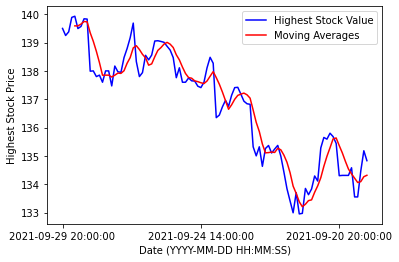

In [59]:
#plot the moving averages along with the actual data on a plot
import numpy as np
x_vals = np.arange(0, len(dfnew))
plt.plot(x_vals, dfnew["high"], color='blue', label="Highest Stock Value")
plt.plot(x_vals, dfnew["high"].rolling(window=5).mean(), color='red', label="Moving Averages")
plt.xticks(x_vals[::45], dfnew["Date"][::45])
plt.xlabel("Date (YYYY-MM-DD HH:MM:SS)")
plt.ylabel("Highest Stock Price")
plt.legend()

--------------------------------------------------------------
Texas A&M University <br>
Fall 2021 <br>
Texas, **==<br>